In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
%matplotlib inline

In [ ]:
# Load data
df = pd.read_csv('./data/setosa/train.csv')

# Building the model

In [ ]:
# Build the model
model = Sequential()
model.add( Dense( output_dim=1, input_dim=2 ) )
model.add( Activation( 'sigmoid' ) )

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 1)             3           dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 1)             0           dense_1[0][0]                    
Total params: 3
____________________________________________________________________________________________________


# Training

In [5]:
# Prepare the model for training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
X = df[['petal width (cm)', 'petal length (cm)']].values
y = df['setosa'].values

model.fit( X, y, batch_size=16, nb_epoch=100, verbose=1 )

Epoch 1/100
120/120 [==============================] - 0s - loss: 0.3367 - acc: 0.6750     
Epoch 2/100
120/120 [==============================] - 0s - loss: 0.3357 - acc: 0.6750     
Epoch 3/100
120/120 [==============================] - 0s - loss: 0.3346 - acc: 0.6750     
Epoch 4/100
120/120 [==============================] - 0s - loss: 0.3336 - acc: 0.6750     
Epoch 5/100
120/120 [==============================] - 0s - loss: 0.3325 - acc: 0.6750     
Epoch 6/100
120/120 [==============================] - 0s - loss: 0.3315 - acc: 0.6750     
Epoch 7/100
120/120 [==============================] - 0s - loss: 0.3304 - acc: 0.6750     
Epoch 8/100
120/120 [==============================] - 0s - loss: 0.3293 - acc: 0.6750     
Epoch 9/100
120/120 [==============================] - 0s - loss: 0.3283 - acc: 0.6750     
Epoch 10/100
120/120 [==============================] - 0s - loss: 0.3273 - acc: 0.6750     
Epoch 11/100
120/120 [==============================] - 0s - loss: 0.3263 - acc

**TODO Mention what is happening + discuss stochasticity**

# Evaluating

In [8]:
def plot_keras_model():
    
    # Calculate the probability on a mesh
    petal_width_mesh, petal_length_mesh = \
        np.meshgrid( np.linspace(0,3,100), np.linspace(0,8,100) )
    petal_width_mesh = petal_width_mesh.flatten()
    petal_length_mesh = petal_length_mesh.flatten()
    p = model.predict( np.stack( (petal_width_mesh, petal_length_mesh), axis=1 ) )
    p = p.reshape((100,100))
    # Plot the probability on the mesh
    plt.clf()
    plt.imshow( p.T, extent=[0,3,0,8], origin='lower', 
               vmin=0, vmax=1, cmap='RdBu', aspect='auto', alpha=0.7 )
    
    # Plot the data points
    plt.scatter( df['petal width (cm)'], df['petal length (cm)'], c=df['setosa'], cmap='RdBu')
    plt.xlabel('petal width (cm)')
    plt.ylabel('petal length (cm)')
    cb = plt.colorbar()
    cb.set_label('setosa')

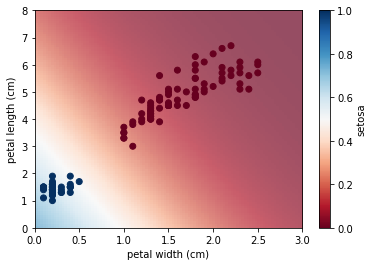

In [9]:
plot_keras_model()

In [13]:
model.layers[0].get_weights() 

[array([[-0.94103497],
        [-0.48457891]], dtype=float32), array([ 1.18619859], dtype=float32)]